In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from collections import Counter

In [148]:
path = ''
df = pd.read_pickle(path + 'ICD_for_Enc.pickle')

In [149]:
from datetime import datetime
df['Enc_Date'] = [datetime.strftime(item, '%Y-%m-%d') for item in df['Enc_Timestamp']]

In [150]:
df.head()

,Person_ID,Person_Nbr,Enc_ID,Enc_Nbr,Enc_Timestamp,Diagnosis_Code_ID,Description,Enc_Date
194529,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,367.4,Presbyopia,2014-12-18
194530,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,373.00,Blepharitis unspecified,2014-12-18
194531,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,250.00,Diabetes mellitus without mention of complicat...,2014-12-18
136763,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,365.02,Anatomical narrow angle borderline glaucoma,2012-10-16
136764,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,250.00,Diabetes Mellitus Type 2 Uncomplicated,2012-10-16


Group data by person_Nbr then by icd code. Same code may appear in different encounter. Same code may also appear within one encounter, which is suggested to keep only one.

In [3]:
{k:{k1:[item for item in v1.Enc_Nbr]
    for k1,v1 in v.groupby('Diagnosis_Code_ID')} 
 for k,v in df.groupby('Person_Nbr')}

{109227: {'E11.9': [4086734], 'H01.001': [4086734], 'H52.03': [4086734]},
 622597: {'250.00': [16488561, 16488561, 6333408],
  '367.4': [16488561, 16488561, 6333408],
  '370.21': [6333408],
  '375.15': [16488561, 16488561]},
 196620: {'250.00': [13975914, 13975914],
  '367.1': [13975914, 13975914],
  '367.20': [13975914, 13975914],
  '367.4': [13975914, 13975914],
  '375.15': [13975914, 13975914]},
 884751: {'362.02': [146465],
  '362.07': [146465],
  '367.1': [146465, 146465],
  '367.20': [146465, 146465],
  '367.4': [146465],
  '379.23': [146465]},
 819216: {'362.35': [5794803, 5794803]},
 98322: {'250.00': [11328070, 11328070],
  '367.20': [11328070, 11328070],
  '375.15': [11328070, 11328070],
  'E11.9': [9254247],
  'H52.03': [9254247]},
 1015827: {'362.11': [6960324],
  '367.4': [6960324],
  '368.01': [6960324],
  '375.15': [6960324],
  '378.10': [6960324]},
 65557: {'250.00': [776480],
  '362.11': [776480],
  '362.81': [776480],
  '367.4': [776480],
  '373.00': [776480],
  'E11.

Give each person all codes with no duplication throughout all encounters

In [4]:
{k:list(v.drop_duplicates()) for k,v in df.groupby('Person_Nbr').Diagnosis_Code_ID}

{109227: ['H52.03', 'E11.9', 'H01.001'],
 622597: ['375.15', '367.4', '250.00', '370.21'],
 196620: ['375.15', '367.1', '367.20', '367.4', '250.00'],
 884751: ['362.07', '367.1', '367.20', '379.23', '362.02', '367.4'],
 819216: ['362.35'],
 98322: ['367.20', '375.15', '250.00', 'E11.9', 'H52.03'],
 1015827: ['367.4', '378.10', '368.01', '362.11', '375.15'],
 65557: ['362.11',
  '250.00',
  '362.81',
  '367.4',
  '373.00',
  'H35.033',
  'E11.9',
  'H52.13',
  'H52.4'],
 360473: ['367.0', '375.15', '250.00'],
 33: ['367.4', '373.00', '250.00'],
 524323: ['250.00', '367.4', '401.9'],
 65572: ['365.01',
  '367.1',
  '367.0',
  '367.21',
  '367.4',
  '365.11',
  'H40.10X4',
  'H52.4',
  'H01.001',
  'H01.004',
  'H25.813',
  'H40.11X3',
  'H40.11X2',
  'H47.291',
  'H47.011',
  'H40.11X4',
  'H47.013'],
 917541: ['367.4', '367.1', '367.20', '250.00', '365.01'],
 393254: ['367.0', '365.11', '369.22', '377.10'],
 688167: ['362.06',
  '365.11',
  '367.4',
  '366.19',
  '365.72',
  '362.83',
 

Calculate the frequncy of each code ever appear in person's encounter history

In [5]:
ICD_frequency={k:len(v.drop_duplicates()) for k,v in df.groupby('Diagnosis_Code_ID').Person_Nbr}
ICD_frequency

{'360.03': 1,
 '360.01': 2,
 'S05.01XA': 5,
 'G44.201': 1,
 'H16.123': 2,
 'H16.122': 3,
 'H54.2': 49,
 'H54.3': 1,
 'H54.7': 4,
 'H50.811': 1,
 'H43.01': 1,
 'H50.812': 3,
 'H18.601': 1,
 'H18.602': 3,
 'H18.603': 21,
 'H52.6': 1,
 'H52.7': 1,
 'H52.4': 4218,
 'T86.840': 1,
 '852.20': 1,
 'T86.849': 1,
 'T86.848': 1,
 '340': 13,
 'S00.11XS': 1,
 '364.03': 1,
 '364.02': 13,
 '364.01': 9,
 '364.00': 37,
 'H11.032': 1,
 '364.05': 3,
 '364.04': 75,
 'H54.0': 10,
 'H02.432': 1,
 'H40.52X4': 1,
 'H16.232': 1,
 'B20': 28,
 'H40.62X3': 1,
 '459.81': 1,
 'G43.B0': 2,
 '459.89': 1,
 'H35.432': 1,
 'H35.433': 2,
 'H40.1113': 9,
 'H40.1112': 9,
 'H40.1111': 10,
 'H54.8': 45,
 'V15.09': 2,
 '429.9': 1,
 '378.42': 37,
 '378.43': 6,
 '378.40': 1,
 '378.41': 8,
 'H18.421': 4,
 'H18.422': 3,
 '378.45': 2,
 '362.30': 15,
 '362.31': 24,
 '362.32': 31,
 '362.33': 60,
 '362.34': 20,
 '362.35': 110,
 '362.36': 106,
 '362.37': 4,
 '366.01': 10,
 '366.00': 16,
 '366.03': 39,
 '366.02': 68,
 '366.04': 140,
 '

Only 4 codes have no descriptions, set them to be 'Null'.

In [6]:
j=0
for i in df.index:
    if type(df.Description[i])==float:
        # float value as nan, we need to give it a string value as 'Null'
        print(df.loc[i,])
        df.set_value(i, 'Description', 'Null')
        j+=1
print(j)

Person_ID            4b073812-5031-8836-311a-47f6b2bb1e50
Person_Nbr                                         362483
Enc_ID               1c15c16b-ca15-78ea-52eb-338392d027d7
Enc_Nbr                                           7354367
Enc_Timestamp                         2014-05-17 15:44:33
Diagnosis_Code_ID                                  378.83
Description                                           NaN
Name: 126893, dtype: object
Person_ID            a83e25df-000a-a8db-56a6-014579b7e5a1
Person_Nbr                                         378156
Enc_ID               6913f73a-2f15-0f2a-5ec9-4f0d627d8fb3
Enc_Nbr                                          12902433
Enc_Timestamp                         2013-03-19 19:45:00
Diagnosis_Code_ID                              367.4367.4
Description                                           NaN
Name: 90899, dtype: object
Person_ID            06c3e488-f53e-593b-98bb-786d4294a6b7
Person_Nbr                                         782773
Enc_ID           

In [7]:
ICD_dictionary={k:sorted(list(v.drop_duplicates()), key=lambda x: len(x), reverse=True) 
                for k,v in df.groupby('Diagnosis_Code_ID').Description}
ICD_dictionary

{'360.03': ['Chronic endophthalmitis'],
 '360.01': ['Acute endophthalmitis'],
 'S05.01XA': ['Corneal abrasion without FB of right eye initial encounter',
  'Corneal abrasion w/o FB of right eye initial encounter',
  'Corneal abrasion w/o FB of rt eye initial encounter'],
 'G44.201': ['Tension-type headache unspecified intractable'],
 'H16.123': ['Filamentary keratitis bilateral'],
 'H16.122': ['Filamentary keratitis left eye'],
 'H54.2': ['Category 2 visual impairment in both eyes',
  'Category 1 visual impairment in both eyes',
  'Low vision both eyes'],
 'H54.3': ['Unqualified visual loss both eyes'],
 'H54.7': ['Unspecified visual loss'],
 'H50.811': ["Duane's syndrome of right eye"],
 'H43.01': ['Vitreous prolapse right eye'],
 'H50.812': ["Duane's syndrome left eye"],
 'H18.601': ['Keratoconus of right eye'],
 'H18.602': ['Keratoconus unspecified left eye', 'Keratoconus of left eye'],
 'H18.603': ['Keratoconus unspecified bilateral', 'Bilateral keratoconus'],
 'H52.6': ['Other dis

In [143]:
invalid_code={k:v for k,v in ICD_dictionary.items() if len(k.split('.')[0])<3}
invalid_code

{'00.01': ['THER ULT HEAD & NECK VES'],
 '00.10': ['IMPLANT CHEMOTHERA AGENT'],
 '10.91': ['SUBCONJUNCTIVAL INJECT'],
 '11.60': ['CORNEAL TRANSPLANT NOS'],
 '11.75': ['RADIAL KERATOTOMY'],
 '12.14': ['IRIDECTOMY NEC'],
 '12.64': ['TRABECULECTOM AB EXTERNO'],
 '13.41': ['CATARAC PHACOEMULS/ASPIR'],
 '13.43': ['CATARACT FRAG/ASPIR NEC'],
 '13.65': ['AFTER-CATARACT EXCISION'],
 '13.69': ['CATARACT EXTRACTION NEC'],
 '13.70': ['INSERT PSEUDOPHAKOS NOS'],
 '14.32': ['RETINAL TEAR CRYOTHERAPY'],
 '14.34': ['RETINAL TEAR LASER COAG'],
 '14.39': ['RETINAL TEAR REPAIR NEC'],
 '14.41': ['SCLERAL BUCKLE W IMPLANT'],
 '16.49': ['EYEBALL ENUCLEATION NEC'],
 '16.92': ['EXCISION ORBITAL LESION'],
 '95.26': ['GLAUCOMA TESTING'],
 '95.34': ['OCULAR PROSTHETICS'],
 '97.31': ['REMOVE EYE PROSTHESIS']}

In [144]:
{item:ICD_frequency[item] for item in invalid_code.keys()}

{'00.01': 1,
 '00.10': 1,
 '10.91': 1,
 '11.60': 3,
 '11.75': 1,
 '12.14': 1,
 '12.64': 1,
 '13.41': 1,
 '13.43': 1,
 '13.65': 2,
 '13.69': 3,
 '13.70': 3,
 '14.32': 1,
 '14.34': 1,
 '14.39': 2,
 '14.41': 1,
 '16.49': 8,
 '16.92': 1,
 '95.26': 1,
 '95.34': 5,
 '97.31': 1}

In [145]:
invalid_data={k:{k1:[{'Code': a, 'Description': b}
                  for a,b in zip(v1.Diagnosis_Code_ID, v1.Description)]
    for k1,v1 in v.groupby('Enc_Timestamp')}  
 for k,v in df[df.Enc_Nbr.isin(
     df[df.Diagnosis_Code_ID.isin(invalid_code)].Enc_Nbr)].groupby('Person_Nbr')}
import pprint
pprint.pprint(invalid_data)

{51074: {Timestamp('2012-02-18 10:30:00'): [{'Code': '362.02',
                                             'Description': 'Proliferative diabetic retinopathy'},
                                            {'Code': '362.02',
                                             'Description': 'Proliferative diabetic retinopathy'},
                                            {'Code': '95.34',
                                             'Description': 'OCULAR PROSTHETICS'}]},
 94282: {Timestamp('2012-01-04 01:04:05'): [{'Code': '366.50',
                                             'Description': 'After-cataract unspecified'},
                                            {'Code': '377.10',
                                             'Description': 'Optic atrophy unspecified'},
                                            {'Code': '367.4',
                                             'Description': 'Presbyopia/ Accommodative Insufficiency'},
                                            {'Code': '36

## Tried to use pymedtermino to separate icd9 and icd10 (But somehow it did not work)

There are codes in icd9 begining with characters 'V' and 'E'. For the 'E' part, icd9 has the form xxxx(.xx). But for the 'V' part forms in icd9 and icd10 are so similar that I can't tell. The module did not work neither so I used R to process the separation, also converter and ancestor.

In [8]:
for k,v in ICD_dictionary.items():
    if ord(k[0])==69 and len(k.split('.')[0])==4:
        print(k,v)

('E986', ['Injury by cutting and piercing instruments undetermined whether accidentally or purposely inflicted'])
('E931.4', ['Antimalarials and drugs acting on other blood protozoa causing adverse effects in therapeutic use'])
('E931.3', ['Quinoline and hydroxyquinoline derivatives causing adverse effects in therapeutic use'])
('E914', ['Foreign body accidentally entering eye and adnexa'])


In [9]:
for k,v in ICD_dictionary.items():
    if ord(k[0])==86:
        print(k,v)

('V15.09', ['Other allergy other than to medicinal agents'])
('V08', ['Human immunodeficiency virus (HIV) infection without symptoms of the illness', 'Asymptomatic human immunodeficiency virus (hiv) infection status', 'Asymptomatic human immunodeficiency virus [HIV] infection status', 'Asymptomatic human immunodeficiency virus (hiv) in', 'HIV - Human immunodeficiency virus infection', 'HIV'])
('V80.1', ['Screening for glaucoma', 'Glaucoma screening'])
('V67.00', ['Follow-up examination following surgery unspecified'])
('V19.11', ['Family history of glaucoma'])
('V49.89', ['Other specified conditions influencing health status'])
('V72.0', ['Examination of eyes and vision', 'Exam of eyes and vision', 'Vision exam'])
('V70.3', ['General medical exam for driving license'])
('V58.69', ['Long-term (current) use of other medications', 'Long-term use of high-risk medication', 'Long term use of high risk medication', 'Current use of high risk medication', 'Current use of high-risk medication', 

In [10]:
!pip install PyMedTermino

In [11]:
from pymedtermino import *
from pymedtermino.icd10 import *
ICD10["E10"]

OperationalError: no such table: Concept

## Why I didn't just use the date to divide ICD9 and ICD10?!

## Read ICD 9 from R processed codes and explanation

In [161]:
len(df[df.Enc_Date>'2015-10-01'].Diagnosis_Code_ID.drop_duplicates())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
df.Diagnosis_Code_ID.drop_duplicates().to_csv('ICD_codes.csv', index=False)

In [13]:
ICD_9_codes=pd.read_csv('icd9_codes.csv')
ICD_9_codes.head()

,codes,official_explanation
0,RETINAL,Null
1,00.01,Null
2,00.10,Null
3,10.91,"Primary tuberculous infection, unspecified, ba..."
4,11.60,"Tuberculous pneumonia [any form], unspecified"


In [14]:
ICD_9_dictionary = {k:ICD_dictionary[k] for k in ICD_9_codes.codes}
ICD_9_dictionary

{'00.01': ['THER ULT HEAD & NECK VES'],
 '00.10': ['IMPLANT CHEMOTHERA AGENT'],
 '011.90': ['Unspecified pulmonary tuberculosis unspecified examination'],
 '042': ['Human immunodeficiency virus [HIV] disease',
  'Human immunodeficiency virus (hiv) disease'],
 '053.20': ['Herpes zoster dermatitis of eyelid',
  'Herpes zoster ophthalmicus'],
 '053.21': ['Herpes zoster keratoconjunctivitis'],
 '053.22': ['Herpes zoster iridocyclitis'],
 '053.29': ['Herpes zoster with other ophthalmic complications'],
 '053.79': ['Herpes zoster with other specified complications'],
 '053.8': ['Herpes zoster with unspecified complication'],
 '053.9': ['Herpes zoster without mention of complication', 'Herpes zoster'],
 '054.10': ['Genital herpes unspecified'],
 '054.40': ['Herpes simplex (infection due to the Herpes simplex virus) with eye complications',
  'Herpes simplex with unspecified ophthalmic complication',
  'Recurrent Herpes Simplex Keratitis'],
 '054.42': ['Dendritic keratitis'],
 '054.43': ['Herp

In [15]:
len(ICD_9_dictionary)

930

### There are 16 codes with null values exist in explanation
3 of them have no values in both explanation and description

In [16]:
ICD_9_df = ICD_9_codes.copy()
ICD_9_df['description'] = [ICD_dictionary[k] for k in ICD_9_df.codes]
ICD_9_df.head()

,codes,official_explanation,description
0,RETINAL,Null,[Null]
1,00.01,Null,[THER ULT HEAD & NECK VES]
2,00.10,Null,[IMPLANT CHEMOTHERA AGENT]
3,10.91,"Primary tuberculous infection, unspecified, ba...",[SUBCONJUNCTIVAL INJECT]
4,11.60,"Tuberculous pneumonia [any form], unspecified",[CORNEAL TRANSPLANT NOS]


In [22]:
# Since ICD_9_df.description is sorted decreasingly by the length of descriptions
# Another null value of description in data has other non-null descriptions
ICD_9_df[[item[0]=='Null' for item in ICD_9_df.description]]

,codes,official_explanation,description
0,RETINAL,Null,[Null]
248,362.362.54,Null,[Null]
411,367.4367.4,Null,[Null]


In [23]:
ICD_9_df[ICD_9_df.official_explanation=='Null']

,codes,official_explanation,description
0,RETINAL,Null,[Null]
1,00.01,Null,[THER ULT HEAD & NECK VES]
2,00.10,Null,[IMPLANT CHEMOTHERA AGENT]
8,12.64,Null,[TRABECULECTOM AB EXTERNO]
12,13.69,Null,[CATARACT EXTRACTION NEC]
13,13.70,Null,[INSERT PSEUDOPHAKOS NOS]
14,14.32,Null,[RETINAL TEAR CRYOTHERAPY]
15,14.34,Null,[RETINAL TEAR LASER COAG]
16,14.39,Null,[RETINAL TEAR REPAIR NEC]
17,14.41,Null,[SCLERAL BUCKLE W IMPLANT]


In [24]:
temp=ICD_9_df[ICD_9_df.official_explanation=='Null']
null_cases=[temp.description[i][0]=='Null' for i in temp.index]
temp[null_cases]

,codes,official_explanation,description
0,RETINAL,Null,[Null]
248,362.362.54,Null,[Null]
411,367.4367.4,Null,[Null]


For these values, they all exist only once over all data and corresponding to their existance, another code also exists, which means these inexplanable codes are typos. So we can delete them directly from the previous dict and df

In [25]:
{k:ICD_frequency[k] for k in temp[null_cases].codes}

{'362.362.54': 1, '367.4367.4': 1, 'RETINAL': 1}

In [26]:
{k:{k1:[item for item in v1.Diagnosis_Code_ID]
    for k1,v1 in v.groupby('Enc_Nbr')}  
 for k,v in df[df.Enc_Nbr.isin(
     df[df.Diagnosis_Code_ID.isin(temp[null_cases].codes)].Enc_Nbr)].groupby('Person_Nbr')}

{378156: {12902433: ['367.4', '367.4367.4']},
 782773: {6965466: ['362.40', 'RETINAL']},
 1037105: {1454725: ['362.54', '362.362.54']}}

In [27]:
ICD_9_df=ICD_9_df.drop(temp[null_cases].index)

In [28]:
for item in temp[null_cases].codes:
    ICD_9_dictionary.pop(item, None)
len(ICD_9_dictionary)

927

In [29]:
df=df.drop(df[df.Diagnosis_Code_ID.isin(temp[null_cases].codes)].index)

In [30]:
for item in temp[null_cases].codes:
    ICD_frequency.pop(item, None)
len(ICD_frequency)

2136

###  Codes may have multiple descriptions in data

In [31]:
sorted({k:len(v) for k,v in ICD_9_dictionary.items()}.items(), key=lambda x:x[1], reverse=True)

[('250.00', 39),
 ('365.01', 20),
 ('250.52', 14),
 ('367.4', 11),
 ('369.60', 10),
 ('401.9', 9),
 ('375.15', 9),
 ('373.12', 9),
 ('365.02', 7),
 ('362.57', 7),
 ('365.11', 7),
 ('250.50', 7),
 ('364.3', 7),
 ('366.16', 7),
 ('362.36', 6),
 ('365.05', 6),
 ('367.1', 6),
 ('250.01', 6),
 ('362.56', 6),
 ('368.46', 6),
 ('379.91', 6),
 ('366.53', 6),
 ('362.07', 6),
 ('362.01', 6),
 ('366.19', 6),
 ('434.91', 6),
 ('372.14', 6),
 ('374.30', 6),
 ('371.57', 5),
 ('374.89', 5),
 ('361.00', 5),
 ('377.49', 5),
 ('367.0', 5),
 ('224.6', 5),
 ('369.4', 5),
 ('369.9', 5),
 ('379.21', 5),
 ('370.33', 5),
 ('362.83', 5),
 ('362.50', 5),
 ('379.09', 5),
 ('362.05', 5),
 ('366.14', 5),
 ('368.9', 5),
 ('743.56', 5),
 ('361.81', 5),
 ('250.92', 5),
 ('365.73', 4),
 ('362.34', 4),
 ('250.02', 4),
 ('365.00', 4),
 ('373.9', 4),
 ('374.05', 4),
 ('378.51', 4),
 ('379.24', 4),
 ('918.1', 4),
 ('362.63', 4),
 ('362.81', 4),
 ('372.00', 4),
 ('362.54', 4),
 ('367.20', 4),
 ('363.30', 4),
 ('362.04', 4)

### Get the ancestors for the codes

Extract the ancestor as the part before dot. Calculate the ancesotr's frequency in person's overall history, and plot a histgram.

In [32]:
from collections import defaultdict
ICD_9_frequency=defaultdict(int)
for k in ICD_9_dictionary.keys():
    ICD_9_frequency[k.split('.')[0]] += ICD_frequency[k]
sorted(ICD_9_frequency.items(), key=lambda x: x[1], reverse=True)

[('367', 17148),
 ('362', 9566),
 ('250', 9120),
 ('366', 7170),
 ('365', 6178),
 ('375', 3981),
 ('373', 2803),
 ('379', 1925),
 ('401', 1489),
 ('372', 1423),
 ('368', 1193),
 ('361', 816),
 ('378', 780),
 ('371', 687),
 ('377', 542),
 ('370', 515),
 ('369', 511),
 ('374', 502),
 ('364', 433),
 ('363', 346),
 ('360', 269),
 ('784', 180),
 ('743', 117),
 ('224', 103),
 ('376', 85),
 ('918', 79),
 ('351', 54),
 ('930', 49),
 ('434', 44),
 ('042', 43),
 ('135', 42),
 ('077', 32),
 ('346', 31),
 ('921', 29),
 ('054', 25),
 ('216', 24),
 ('796', 24),
 ('692', 23),
 ('333', 19),
 ('950', 19),
 ('871', 19),
 ('270', 17),
 ('272', 17),
 ('448', 17),
 ('227', 17),
 ('710', 15),
 ('348', 14),
 ('242', 14),
 ('053', 14),
 ('282', 14),
 ('340', 13),
 ('706', 13),
 ('790', 13),
 ('437', 13),
 ('996', 12),
 ('782', 12),
 ('253', 12),
 ('695', 11),
 ('704', 11),
 ('435', 11),
 ('115', 10),
 ('13', 10),
 ('16', 9),
 ('246', 8),
 ('438', 8),
 ('959', 7),
 ('802', 7),
 ('995', 6),
 ('780', 6),
 ('459'

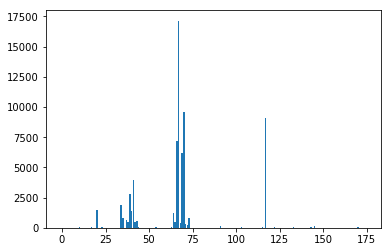

In [33]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(ICD_9_frequency)), ICD_9_frequency.values())
plt.show()

There are 175 different ancestors in ICD 9 data

In [34]:
len(ICD_9_frequency.keys())

175

In [90]:
ICD_9_df['ancestor'] = [k.split('.')[0] for k in ICD_9_df.codes]
ICD_9_df.head()

,codes,official_explanation,description,ancestor
1,00.01,Null,[THER ULT HEAD & NECK VES],00
2,00.10,Null,[IMPLANT CHEMOTHERA AGENT],00
3,10.91,"Primary tuberculous infection, unspecified, ba...",[SUBCONJUNCTIVAL INJECT],10
4,11.60,"Tuberculous pneumonia [any form], unspecified",[CORNEAL TRANSPLANT NOS],11
5,11.75,"Tuberculous pneumothorax, tubercle bacilli not...",[RADIAL KERATOTOMY],11


I am going to query these ICD code ancestors through Aqua API, so we can find larger class and converter to ICD 10

In [36]:
!pip install aqua-io

In [53]:
import aqua_io
client = aqua_io.Client({ 'client_id': 'ad84e9c56d8a3696e004ed386b2726f5664f778084ac8d3d108efdab5da5d2e1', 
                         'client_secret': 'e5d6d5b370a8f58d5bd243792b99238e67c3150de8dee81408ba9162cdf2e786' })
token = client.access_token().retrieve()
access_token = {'access_token': token.body['access_token']}
client = aqua_io.Client(access_token)

In [55]:
response = client.icd9().top_level_codes()
print(response.code)
print(response.body)

200
[{u'short_description': u'CONGENITAL ANOMALIES (...', u'api_path': u'icd9/740-759', u'name': u'740-759', u'description': u'CONGENITAL ANOMALIES (740-759)'}, {u'short_description': u'ENDOCRINE, NUTRITIONAL...', u'api_path': u'icd9/240-279', u'name': u'240-279', u'description': u'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)'}, {u'short_description': u'DISEASES OF THE BLOOD ...', u'api_path': u'icd9/280-289', u'name': u'280-289', u'description': u'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)'}, {u'short_description': u'MENTAL, BEHAVIORAL AND...', u'api_path': u'icd9/290-319', u'name': u'290-319', u'description': u'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS (290-319)'}, {u'short_description': u'INJURY AND POISONING (...', u'api_path': u'icd9/800-999', u'name': u'800-999', u'description': u'INJURY AND POISONING (800-999)'}, {u'short_description': u'NEOPLASMS (140-239)', u'api_path': u'icd9/140-239', u'name': u'140-239', u'descripti

In [92]:
ancestor_9=[{'range':item['name'].encode('utf8').split('-') ,
             'description':item['description'].encode('utf8').lower()} 
            for item in response.body]

In [93]:
for item in ancestor_9:
    if ord(item['range'][0][0]) in range(48, 57):
        item['prefix']=None
        item['range'][0]=int(item['range'][0])
        item['range'][1]=int(item['range'][1])
    else:
        item['prefix']=item['range'][0][0]
        item['range'][0]=int(item['range'][0][1:])
        item['range'][1]=int(item['range'][1][1:])

In [129]:
icd9 = client.icd9()

ancestor_description=[]
for i in ICD_9_df.index:
    if ICD_9_df.loc[i, 'official_explanation']=='Null':
        ancestor_description.append(['Null'])
        print(ICD_9_df.loc[i,'codes'].replace('.', '-'), 'Null')
        continue
    else:
        if len(ICD_9_df.loc[i,'ancestor'])<3:
            code='0'+ICD_9_df.loc[i,'codes']
        else:
            code=ICD_9_df.loc[i,'codes']
        code=code.replace('.', '-')
        print(code)
        response = icd9.single_code(code)
        if response.code == 200:
            temp = [{'ancestor': item['ancestor']['name'].encode('utf8'), 
                     'description': item['ancestor']['description'].encode('utf8').lower()} 
                    for item in response.body['ancestors']]
        else:
            temp=['Null']
        ancestor_description.append(temp)
        print(code, temp)

('00-01', 'Null')
('00-10', 'Null')
010-91
('010-91', [{'ancestor': '001-139', 'description': 'infectious and parasitic diseases (001-139)'}, {'ancestor': '010-018', 'description': 'tuberculosis'}, {'ancestor': '010', 'description': 'primary tuberculous infection'}, {'ancestor': '010.9', 'description': 'primary tuberculous infection, unspecified'}])
011-60
('011-60', [{'ancestor': '001-139', 'description': 'infectious and parasitic diseases (001-139)'}, {'ancestor': '010-018', 'description': 'tuberculosis'}, {'ancestor': '011', 'description': 'pulmonary tuberculosis'}, {'ancestor': '011.6', 'description': 'tuberculous pneumonia [any form]'}])
011-75
('011-75', [{'ancestor': '001-139', 'description': 'infectious and parasitic diseases (001-139)'}, {'ancestor': '010-018', 'description': 'tuberculosis'}, {'ancestor': '011', 'description': 'pulmonary tuberculosis'}, {'ancestor': '011.7', 'description': 'tuberculous pneumothorax'}])
011-90
('011-90', [{'ancestor': '001-139', 'description': 

ClientError: 

In [ ]:
ICD_9_df['ancestor_description'] = ancestor_description
ICD_9_df.head()

In [123]:
for i in ICD_9_df.index:
    print ICD_9_df.loc[i,'codes'].replace('.', '-')

00-01
00-10
10-91
11-60
11-75
011-90
12-14
12-64
13-41
13-43
13-65
13-69
13-70
14-32
14-34
14-39
14-41
16-49
16-92
042
053-20
053-21
053-22
053-29
053-79
053-8
053-9
054-10
054-40
054-42
054-43
054-44
054-49
054-9
070-59
070-70
077-1
077-3
077-8
077-99
078-10
079-4
079-53
090-3
091-50
092-9
094-89
95-26
95-34
97-31
115-90
115-92
115-99
130-2
130-9
135
190-6
203-00
203-01
208-10
213-0
216-1
216-9
224-0
224-1
224-2
224-3
224-4
224-5
224-6
224-8
224-9
225-0
225-2
227-3
228-01
229-9
231-2
233-0
237-71
238-8
239-81
242-00
242-90
244-0
244-1
244-2
244-9
245-9
246-8
246-9
249-00
249-50
249-81
250-00
250-01
250-02
250-03
250-10
250-11
250-20
250-21
250-22
250-23
250-30
250-31
250-32
250-40
250-42
250-50
250-51
250-52
250-53
250-60
250-70
250-71
250-72
250-80
250-82
250-83
250-90
250-91
250-92
250-93
253-5
253-8
270-2
270-8
272-0
272-4
278-00
278-02
279-51
279-52
281-9
282-5
282-60
282-61
282-63
282-68
282-7
284-2
285-9
287-8
294-10
294-8
300-00
300-11
300-9
305-60
307-81
312-39
314-00
315-00
3

In [106]:
'00.01'.replace('.', '-')

'00-01'

In [ ]:
ICD_9_df['ancestor_description']=[item for item in ICD_9_df.ancestor]

In [39]:
ICD_9_df.to_csv('ICD_9_dictionary.csv', index=False)

## Read ICD 10 from R processed codes and explanation

In [40]:
ICD_10_codes=pd.read_csv('icd10_codes.csv')
ICD_10_codes.head()

,codes,official_explanation
0,A51.43,Secondary syphilitic oculopathy
1,A92.0,Chikungunya virus disease
2,B00.52,Herpesviral keratitis
3,B00.59,Other herpesviral disease of eye
4,B00.9,"Herpesviral infection, unspecified"


In [41]:
ICD_10_dictionary = {k:ICD_dictionary[k] for k in ICD_10_codes.codes}
ICD_10_dictionary

{'H52.211': ['Irregular astigmatism right eye'],
 'H52.213': ['Irregular astigmatism bilateral'],
 'H11.431': ['Conjunctival hyperemia right eye'],
 'H18.231': ['Secondary corneal edema of right eye',
  'Secondary corneal edema right eye'],
 'H18.233': ['Secondary corneal edema bilateral'],
 'H18.232': ['Secondary corneal edema left eye'],
 'H11.222': ['Conjunctival granuloma left eye'],
 'L71.9': ['Rosacea'],
 'G44.201': ['Tension-type headache unspecified intractable'],
 'V72.0': ['Examination of eyes and vision',
  'Exam of eyes and vision',
  'Vision exam'],
 'H16.123': ['Filamentary keratitis bilateral'],
 'H16.122': ['Filamentary keratitis left eye'],
 'H54.2': ['Category 2 visual impairment in both eyes',
  'Category 1 visual impairment in both eyes',
  'Low vision both eyes'],
 'H52.212': ['Irregular astigmatism left eye'],
 'V87.49': ['Personal history of other drug therapy'],
 'H54.7': ['Unspecified visual loss'],
 'H50.811': ["Duane's syndrome of right eye"],
 'H04.413': ['C

In [42]:
len(ICD_10_dictionary)

1209

### There are also 76 codes with null values in explanation and description exist in ICD 10 table
Luckily they are not inexplanable at all, they all have desciptions

In [43]:
ICD_10_df = ICD_10_codes.copy()
ICD_10_df['description'] = [ICD_dictionary[k] for k in ICD_10_df.codes]
ICD_10_df.head()

,codes,official_explanation,description
0,A51.43,Secondary syphilitic oculopathy,[Secondary syphilitic chorioretinitis]
1,A92.0,Chikungunya virus disease,[Chikungunya virus disease]
2,B00.52,Herpesviral keratitis,"[Herpesviral keratoconjunctivitis, Herpesviral..."
3,B00.59,Other herpesviral disease of eye,[Other herpesviral disease of eye]
4,B00.9,"Herpesviral infection, unspecified",[Herpes simplex infection]


In [44]:
temp=ICD_10_df[ICD_10_df.official_explanation=='Null']
temp

,codes,official_explanation,description
53,E08.3212,Null,[Diabetes mellitus due to underlying condition...
54,E08.3213,Null,[Diabetes mellitus due to underlying condition...
56,E08.3293,Null,[Diabetes mellitus due to underlying condition...
58,E08.3313,Null,[Diabetes mellitus due to underlying condition...
60,E08.3393,Null,[Diabetes mellitus due to underlying condition...
62,E08.3412,Null,[Diabetes mellitus due to underlying condition...
65,E08.3513,Null,[Diabetes mellitus due to underlying condition...
68,E08.8,Null,[Diabetes due to underlying condition w/ compl...
80,E10.3291,Null,[Type 1 diabetes mellitus with mild nonprolife...
81,E10.3292,Null,[Type 1 diabetes mellitus with mild nonprolife...


### Codes may have multiple descriptions in data

In [45]:
sorted({k:len(v) for k,v in ICD_10_dictionary.items()}.items(), key=lambda x:x[1], reverse=True)

[('E11.9', 18),
 ('E11.8', 13),
 ('E11.319', 12),
 ('E11.329', 11),
 ('E11.339', 11),
 ('E11.359', 10),
 ('I10', 10),
 ('H40.013', 9),
 ('H54.42', 9),
 ('E11.311', 8),
 ('E08.9', 7),
 ('V58.69', 7),
 ('E11.331', 7),
 ('E11.351', 7),
 ('H54.12', 7),
 ('E13.319', 7),
 ('E08.311', 7),
 ('E10.9', 7),
 ('E08.329', 6),
 ('V08', 6),
 ('E11.349', 6),
 ('E11.341', 6),
 ('H53.453', 6),
 ('H11.32', 6),
 ('H54.52', 6),
 ('H54.51', 6),
 ('E11.321', 6),
 ('E08.351', 6),
 ('E13.359', 6),
 ('E13.329', 5),
 ('H43.811', 5),
 ('H33.42', 5),
 ('H43.812', 5),
 ('H47.093', 5),
 ('H31.012', 5),
 ('E08.339', 5),
 ('H54.41', 5),
 ('E11.39', 5),
 ('E13.311', 5),
 ('H34.831', 4),
 ('H33.41', 4),
 ('H43.392', 4),
 ('H31.011', 4),
 ('H00.14', 4),
 ('S05.01XD', 4),
 ('H20.9', 4),
 ('E13.331', 4),
 ('E13.339', 4),
 ('V43.1', 4),
 ('H27.02', 4),
 ('H11.31', 4),
 ('H16.223', 4),
 ('T15.12XA', 4),
 ('H47.092', 4),
 ('H47.099', 4),
 ('H47.291', 4),
 ('E13.351', 4),
 ('H40.033', 4),
 ('V12.54', 4),
 ('H53.461', 4),
 ('H3

### Get the ancestors for the codes

Extract the ancestor as the part before dot. Calculate the ancesotr's frequency in person's overall history, and plot a histgram.

In [46]:
ICD_10_frequency=defaultdict(int)
for k in ICD_10_dictionary.keys():
    ICD_10_frequency[k.split('.')[0]] += ICD_frequency[k]
sorted(ICD_10_frequency.items(), key=lambda x: x[1], reverse=True)

[('H52', 5966),
 ('E11', 5567),
 ('H40', 2903),
 ('H25', 2636),
 ('H35', 1544),
 ('H04', 1443),
 ('V43', 1319),
 ('H01', 874),
 ('I10', 798),
 ('Z96', 698),
 ('H53', 473),
 ('H43', 448),
 ('H26', 381),
 ('H10', 368),
 ('H33', 303),
 ('E13', 299),
 ('H47', 278),
 ('H50', 262),
 ('H18', 251),
 ('H02', 250),
 ('H54', 232),
 ('H16', 220),
 ('E08', 204),
 ('H11', 173),
 ('E10', 168),
 ('H34', 155),
 ('H44', 142),
 ('H00', 114),
 ('Z79', 109),
 ('V58', 109),
 ('H31', 107),
 ('H20', 99),
 ('H17', 77),
 ('H51', 68),
 ('R51', 68),
 ('H21', 50),
 ('D31', 45),
 ('H57', 44),
 ('H27', 38),
 ('S05', 38),
 ('H05', 37),
 ('I63', 36),
 ('H59', 33),
 ('V45', 30),
 ('V12', 29),
 ('B20', 28),
 ('V08', 27),
 ('V72', 26),
 ('H15', 26),
 ('M35', 24),
 ('G51', 21),
 ('H55', 20),
 ('V42', 20),
 ('H49', 20),
 ('T15', 17),
 ('R73', 17),
 ('D86', 15),
 ('E78', 15),
 ('L25', 13),
 ('G43', 12),
 ('B30', 12),
 ('B00', 12),
 ('E23', 12),
 ('H30', 12),
 ('Z94', 12),
 ('G45', 10),
 ('D23', 10),
 ('Z90', 10),
 ('H46', 1

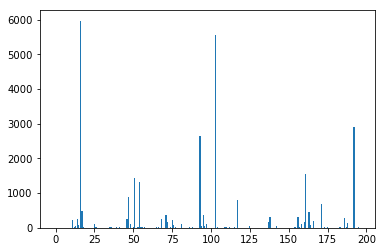

In [47]:
plt.bar(range(0,len(ICD_10_frequency)), ICD_10_frequency.values())
#plt.xticks(range(0, len(ICD_10_frequency)), ICD_10_frequency.keys())
plt.show()

There are 196 different ancestors in ICD 10 data

In [48]:
len(ICD_10_frequency.keys())

196

In [49]:
ICD_10_df['ancestor'] = [k.split('.')[0] for k in ICD_10_df.codes]
ICD_10_df.head()

,codes,official_explanation,description,ancestor
0,A51.43,Secondary syphilitic oculopathy,[Secondary syphilitic chorioretinitis],A51
1,A92.0,Chikungunya virus disease,[Chikungunya virus disease],A92
2,B00.52,Herpesviral keratitis,"[Herpesviral keratoconjunctivitis, Herpesviral...",B00
3,B00.59,Other herpesviral disease of eye,[Other herpesviral disease of eye],B00
4,B00.9,"Herpesviral infection, unspecified",[Herpes simplex infection],B00


I am going to query these ICD code ancestors through Aqua API, so we can find larger class and converter to ICD 9

In [50]:
ICD_10_df.to_csv('ICD_10_dictionary.csv', index=False)